In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeRegressor

In [3]:
df=pd.read_csv('Downloads/amazon_alexa.csv')
print(df)


      rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                

In [4]:
df.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [5]:
df.tail(10)

,rating,date,variation,verified_reviews,feedback
3140,4,30-Jul-18,White Dot,Barry,1
3141,3,30-Jul-18,Black Dot,,1
3142,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1
3143,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1
3144,5,30-Jul-18,Black Dot,love it,1
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [6]:
df.sample(10)

,rating,date,variation,verified_reviews,feedback
2666,5,30-Jul-18,Black Dot,"We are still in the discovery phase, but so fa...",1
56,5,30-Jul-18,Charcoal Fabric,Works as advertised. Very easy to setup. Still...,1
1115,4,30-Jul-18,Black Spot,"I like how small it is, but I’m still able to ...",1
1389,1,16-Jul-18,Black Spot,,0
2557,5,30-Jul-18,Black Dot,Un excelente equipo inteligente al estar conec...,1
2093,5,30-Jun-18,Black Plus,I love the Echo Plus mainly because I don't ha...,1
2764,5,30-Jul-18,Black Dot,It is just not as loud as I thought it was goi...,1
2626,5,30-Jul-18,White Dot,I love to watch my wife argue with Alexa. I w...,1
359,5,29-Jul-18,White,This is our 2nd one and we love it!,1
2157,5,30-Jul-18,Configuration: Fire TV Stick,The Fire TV Stick was easy to set up and use. ...,1


In [7]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
df['rating'].nunique()

5

In [9]:
df['rating']

0       5
1       5
2       4
3       5
4       5
       ..
3145    5
3146    5
3147    5
3148    5
3149    4
Name: rating, Length: 3150, dtype: int64

In [10]:
print(df.isnull())

      rating   date  variation  verified_reviews  feedback
0      False  False      False             False     False
1      False  False      False             False     False
2      False  False      False             False     False
3      False  False      False             False     False
4      False  False      False             False     False
...      ...    ...        ...               ...       ...
3145   False  False      False             False     False
3146   False  False      False             False     False
3147   False  False      False             False     False
3148   False  False      False             False     False
3149   False  False      False             False     False

[3150 rows x 5 columns]


In [11]:
print(df[df.isnull()])


      rating date variation verified_reviews  feedback
0        NaN  NaN       NaN              NaN       NaN
1        NaN  NaN       NaN              NaN       NaN
2        NaN  NaN       NaN              NaN       NaN
3        NaN  NaN       NaN              NaN       NaN
4        NaN  NaN       NaN              NaN       NaN
...      ...  ...       ...              ...       ...
3145     NaN  NaN       NaN              NaN       NaN
3146     NaN  NaN       NaN              NaN       NaN
3147     NaN  NaN       NaN              NaN       NaN
3148     NaN  NaN       NaN              NaN       NaN
3149     NaN  NaN       NaN              NaN       NaN

[3150 rows x 5 columns]


In [12]:
print(df.isnull().sum())


rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64


In [13]:
print(df.notnull())


      rating  date  variation  verified_reviews  feedback
0       True  True       True              True      True
1       True  True       True              True      True
2       True  True       True              True      True
3       True  True       True              True      True
4       True  True       True              True      True
...      ...   ...        ...               ...       ...
3145    True  True       True              True      True
3146    True  True       True              True      True
3147    True  True       True              True      True
3148    True  True       True              True      True
3149    True  True       True              True      True

[3150 rows x 5 columns]


In [14]:
print(df[df.notnull()])


      rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                

In [15]:
print(df.notnull().sum())

rating              3150
date                3150
variation           3150
verified_reviews    3150
feedback            3150
dtype: int64


In [16]:
df.groupby('rating').describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [17]:
df.date.describe()

count          3150
unique           77
top       30-Jul-18
freq           1603
Name: date, dtype: object

In [18]:
df.groupby('feedback').describe()

rating                                             
           count      mean       std  min  25%  50%  75%  max
feedback                                                     
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0

In [19]:
df.feedback.value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [20]:
df.rating.value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [21]:
print(df.shape)

(3150, 5)


Text(0.5, 1.0, 'Visualizing the rating dist')

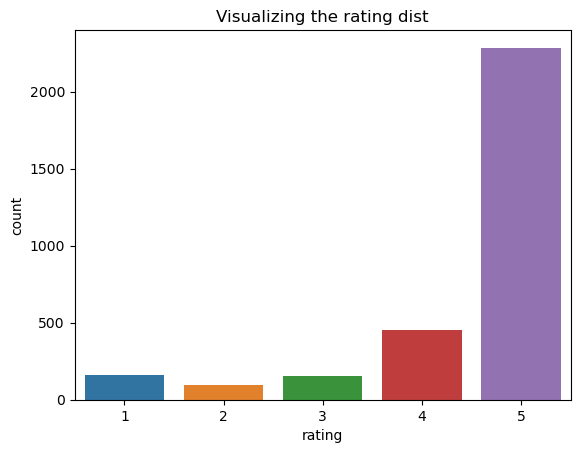

In [22]:
df=pd.read_csv('Downloads/amazon_alexa.csv')
sns.countplot(x='rating',data=df)
plt.title('Visualizing the rating dist')

In [23]:
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

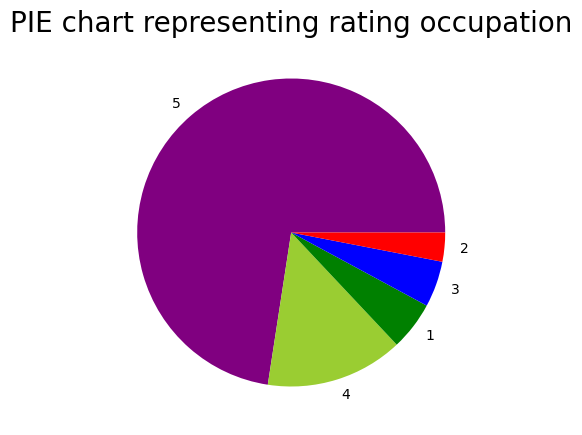

In [24]:
ratings = df["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["purple", "yellowgreen", "green", "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
plt.title("PIE chart representing rating occupation", fontsize=20)
plt.show()

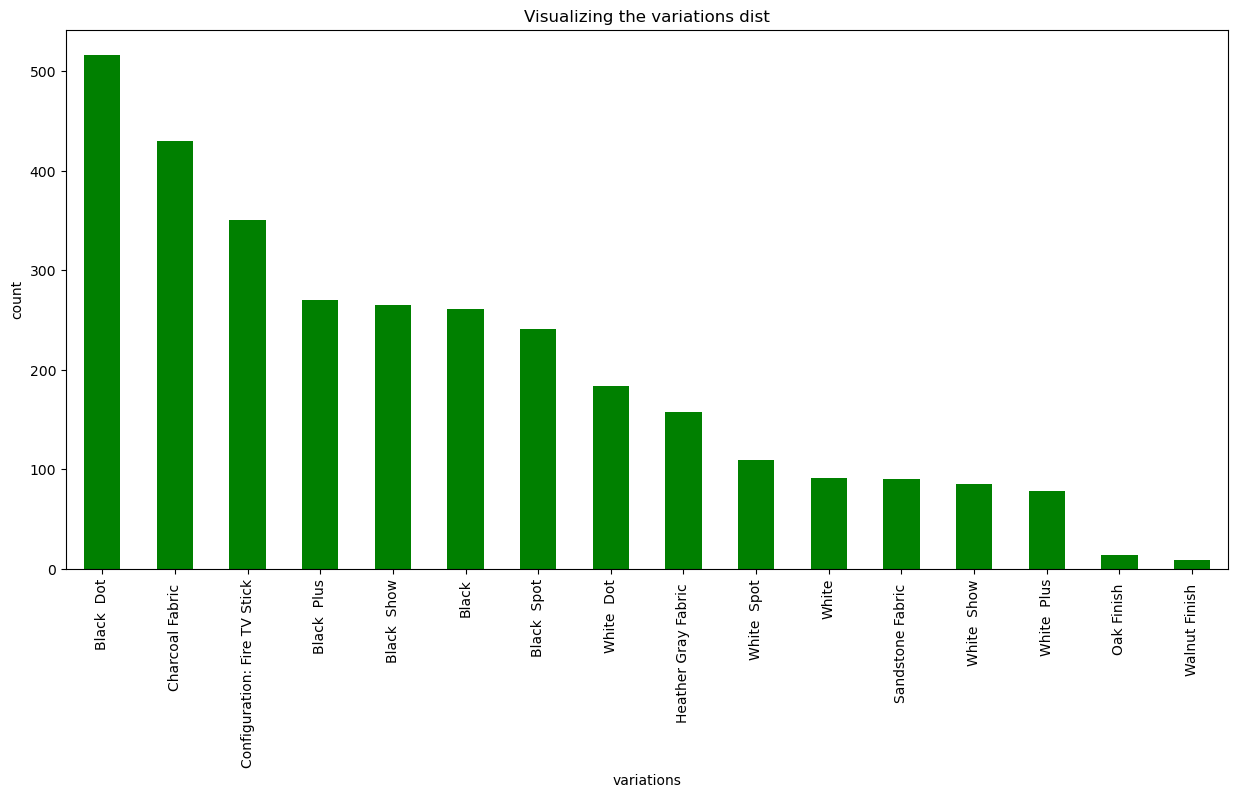

In [25]:
df['variation'].value_counts().plot.bar(color='green',figsize=(15,7))
plt.xlabel('variations')
plt.ylabel('count')
plt.title('Visualizing the variations dist')
plt.show()

Text(0.5, 1.0, 'Visualizing the feedback dist')

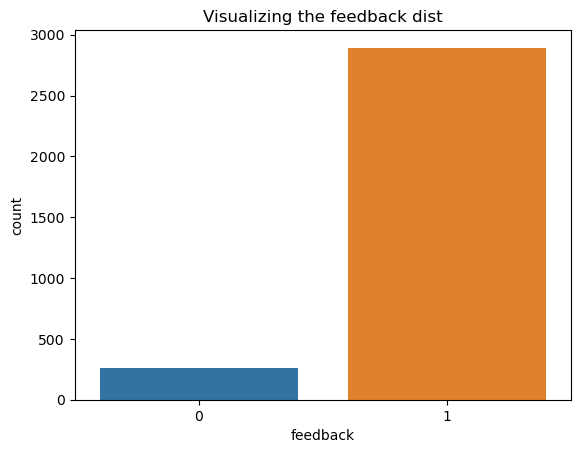

In [26]:
df=pd.read_csv('Downloads/amazon_alexa.csv')
sns.countplot(x='feedback',data=df)
plt.title('Visualizing the feedback dist')

C:\Users\sambr\AppData\Local\Temp\ipykernel_20484\3669933531.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('variation').mean()[['rating']].plot.bar(color='black',figsize=(14,6))


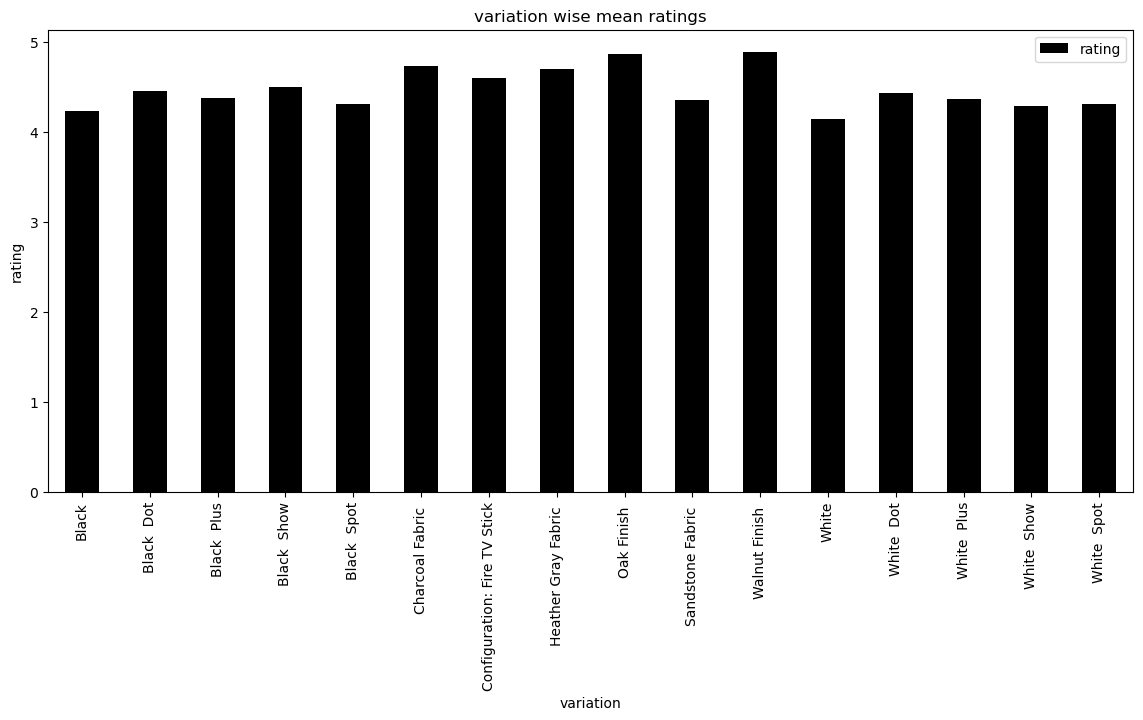

In [27]:
df.groupby('variation').mean()[['rating']].plot.bar(color='black',figsize=(14,6))
plt.xlabel('variation')
plt.ylabel('rating')
plt.title('variation wise mean ratings')
plt.show()

C:\Users\sambr\AppData\Local\Temp\ipykernel_20484\2406995384.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('feedback').mean()[['rating']].plot.bar(color='red',figsize=(5,4))


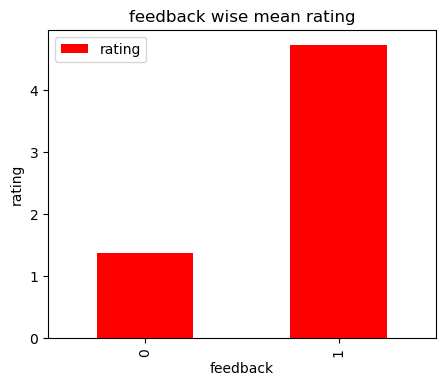

In [28]:
df.groupby('feedback').mean()[['rating']].plot.bar(color='red',figsize=(5,4))
plt.xlabel('feedback')
plt.ylabel('rating')
plt.title('feedback wise mean rating')
plt.show()

Text(0.5, 1.0, 'most frequency occuring words-top 50')

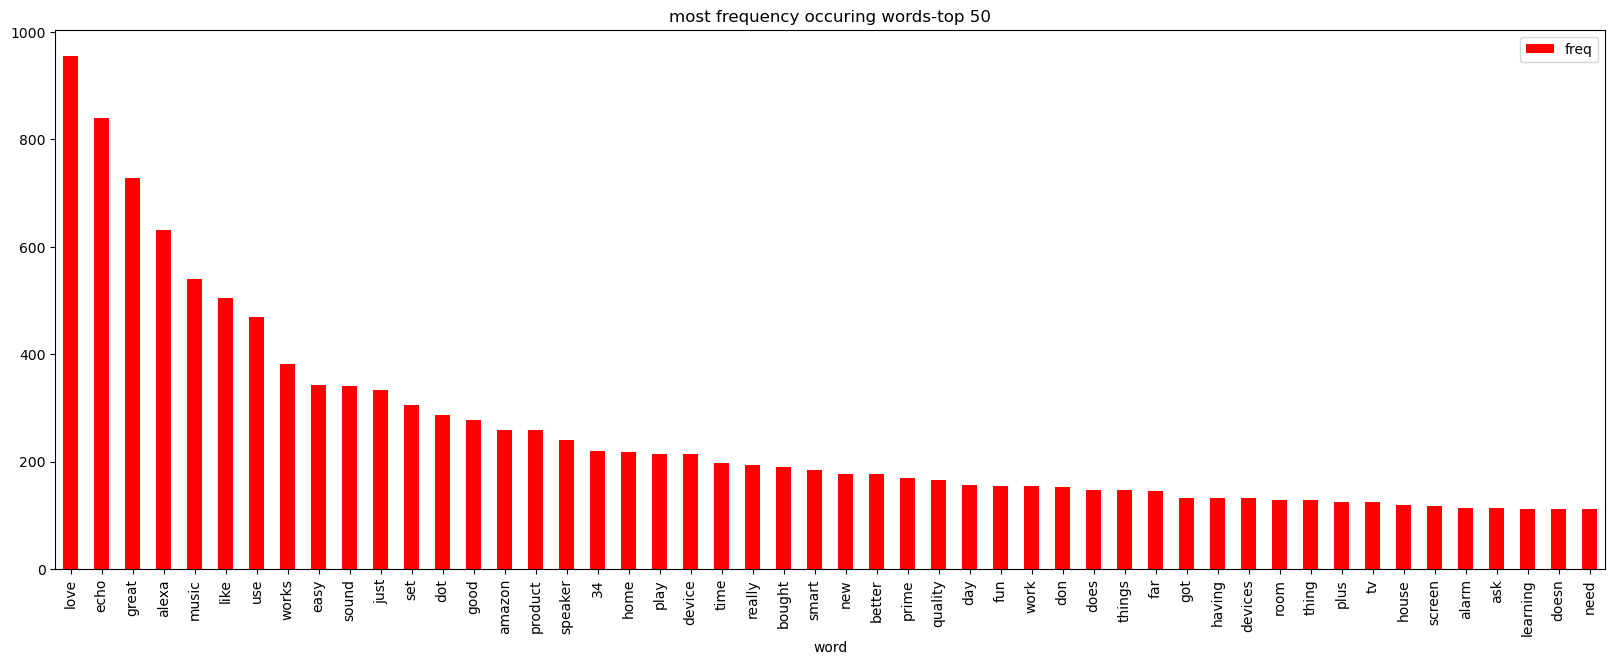

In [29]:
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(df.verified_reviews)
sum_words=words.sum(axis=0)

cc=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
cc = sorted(cc,key=lambda x: x[1],reverse=True)
frequency=pd.DataFrame(cc,columns=['word','freq'])
frequency.head(50).plot(x='word',y='freq',kind='bar',figsize=(20,7),color='red')
plt.title("most frequency occuring words-top 50")

In [30]:
df.loc[df['rating']<=3,'rating']=0
df.loc[df['rating']>3,'rating']=1

In [31]:
stp_words = stopwords.words('english')

def clean_review(review):
    if isinstance(review, str):
        cleanreview = " ".join(word for word in review.split() if word not in stp_words)
        return cleanreview
    else:
        return review
    

df['verified_reviews'] = df['verified_reviews'].apply(clean_review)


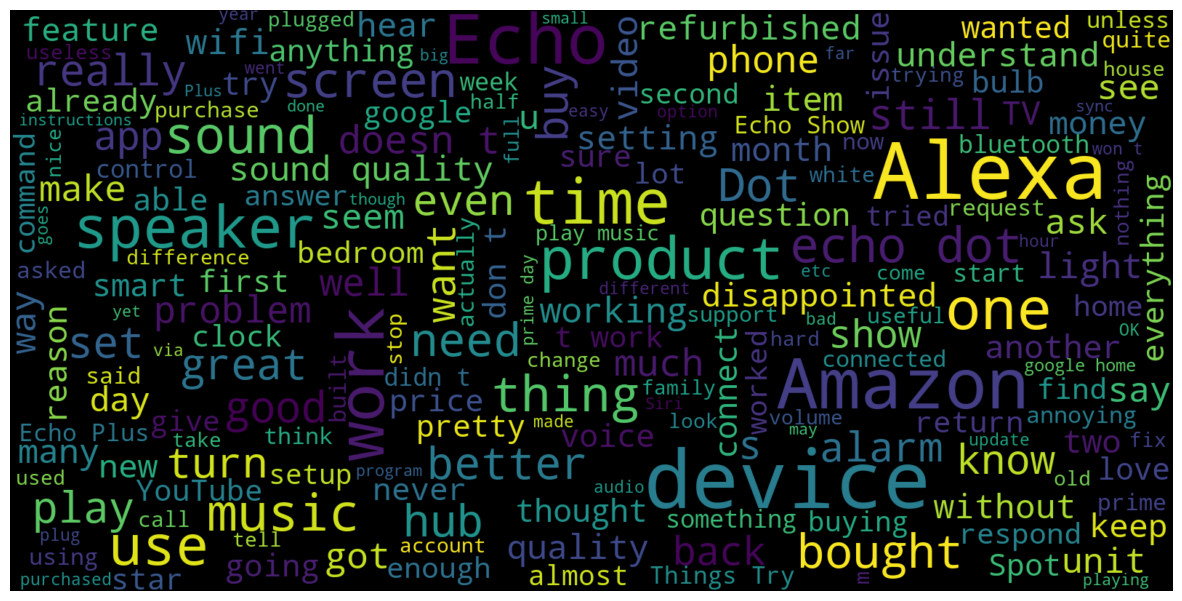

In [32]:
consolidated=' '.join(word for word in df['verified_reviews'][df['rating']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

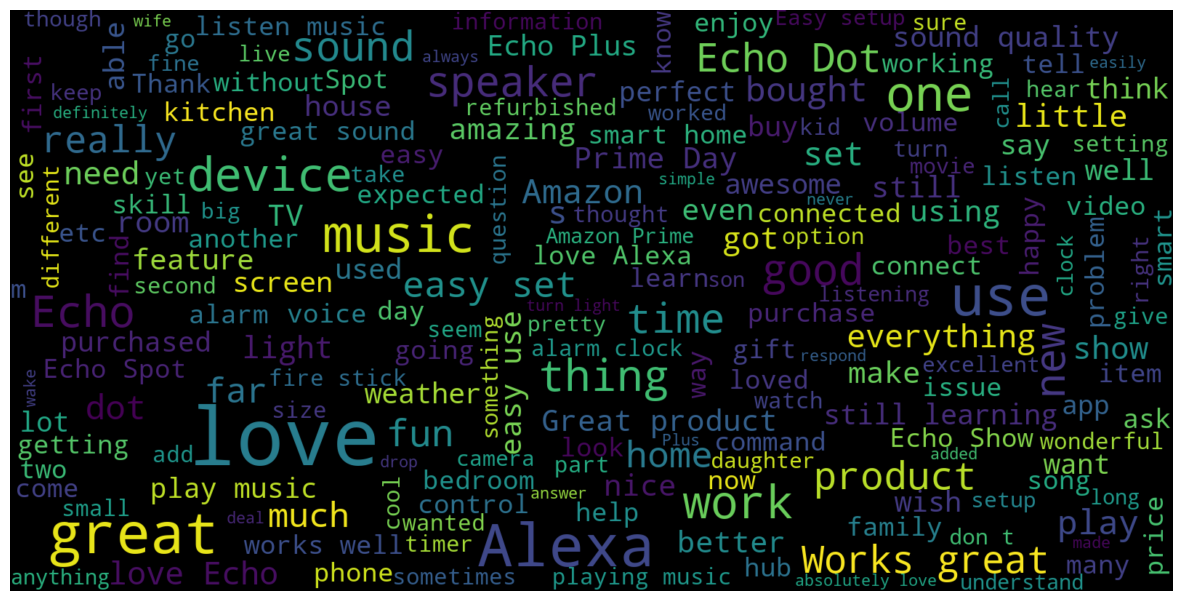

In [33]:
consolidated=' '.join(word for word in df['verified_reviews'][df['rating']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
df = df.dropna(subset=['verified_reviews'])
df['verified_reviews'].fillna('default_text', inplace=True)

In [35]:
x=df['verified_reviews']
x

0                                              Love Echo!
1                                               Loved it!
2       Sometimes playing game, answer question correc...
3       I lot fun thing. My 4 yr old learns dinosaurs,...
4                                                   Music
                              ...                        
3145              Perfect kids, adults everyone between!!
3146    Listening music, searching locations, checking...
3147    I love things, running entire home, TV, lights...
3148    Only complaint I sound quality great. I mostly...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [36]:
y=df['rating']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: rating, Length: 3150, dtype: int64

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv=TfidfVectorizer(max_features=2500)

x=cv.fit_transform(df['verified_reviews']).toarray()

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [39]:
# Printing the shapes of training and testing datasets
print("Training Data - Features (x_train) shape:", x_train.shape)
print("Training Data - Labels (y_train) shape:", y_train.shape)
print("Testing Data - Features (x_test) shape:", x_test.shape)
print("Testing Data - Labels (y_test) shape:", y_test.shape)

# Printing a few samples from the training and testing datasets
print("\nSample from Training Data - Features (x_train):\n", x_train[:5])  # Print the first 5 samples
print("\nSample from Training Data - Labels (y_train):\n", y_train[:5])  # Print the labels corresponding to the first 5 samples
print("\nSample from Testing Data - Features (x_test):\n", x_test[:5])    # Print the first 5 samples
print("\nSample from Testing Data - Labels (y_test):\n", y_test[:5])      # Print the labels corresponding to the first 5 samples


Training Data - Features (x_train) shape: (2362, 2500)
Training Data - Labels (y_train) shape: (2362,)
Testing Data - Features (x_test) shape: (788, 2500)
Testing Data - Labels (y_test) shape: (788,)

Sample from Training Data - Features (x_train):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sample from Training Data - Labels (y_train):
 644     0
597     1
2713    1
1161    1
1361    1
Name: rating, dtype: int64

Sample from Testing Data - Features (x_test):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sample from Testing Data - Labels (y_test):
 2965    1
969     1
1385    1
1233    1
2996    1
Name: rating, dtype: int64


In [40]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print("ACCURACY:",accuracy)

ACCURACY: 0.866751269035533


In [41]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

x_train=mm.fit_transform(x_train)
x_test=mm.transform(x_test)

Training Accuracy: 0.9902624894157493
Testing Accuracy: 0.9098984771573604
[[ 51  61]
 [ 12 664]]


<Axes: >

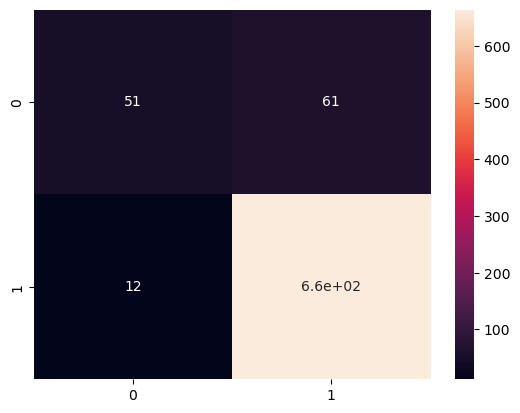

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
MODEL=RandomForestClassifier()
MODEL.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Training Accuracy:",MODEL.score(x_train,y_train))
print("Testing Accuracy:",MODEL.score(x_test,y_test))



cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)